# 富士山から下りたい

授業前課題1では「勾配降下法」に触れました。勾配降下法は山や谷を下ることに例えられます。先週は紙を折って超えることを目指した富士山を、今週は頂上付近から下りていくことにしましょう。

### 断面図の確認

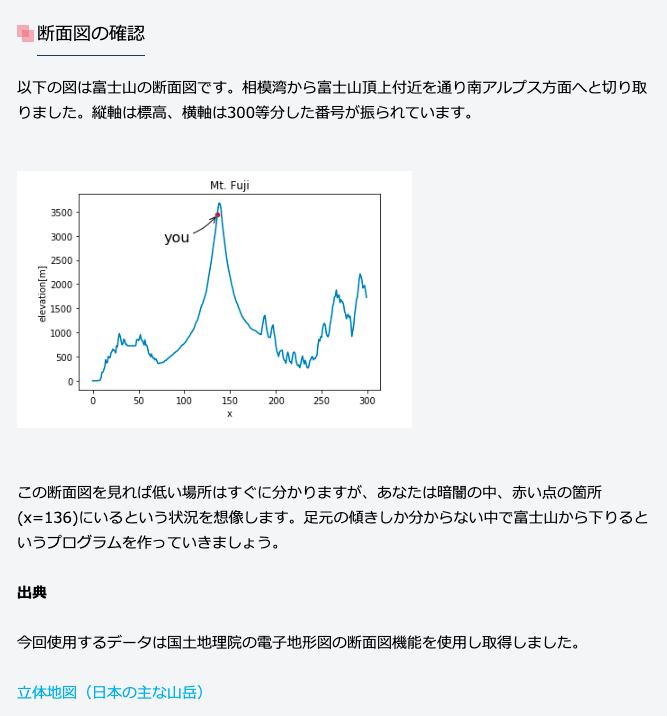

### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("mtfuji_data.csv",delimiter=",", skiprows=1) #同じpwdにファイルを置く必要がある

In [2]:
print(fuji)
print(fuji.shape)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]
(300, 5)


<function matplotlib.pyplot.show(*args, **kw)>

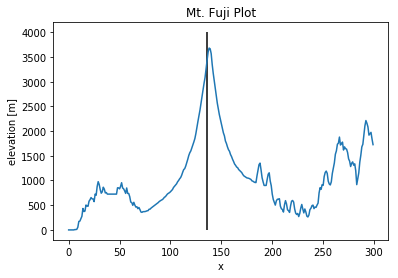

In [3]:
plt.title("Mt. Fuji Plot")
plt.xlabel("x")
plt.ylabel("elevation [m]")
plt.plot(fuji[:, 0], fuji[:, 3])
plt.vlines(136, 0, 4000)
plt.show

### 【問題2】ある地点の勾配を計算する関数を作成

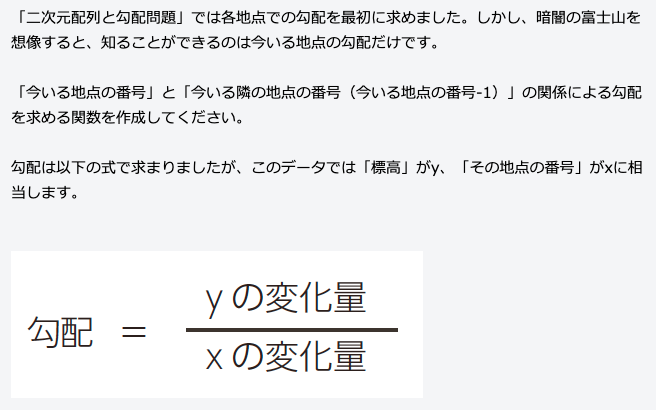

In [8]:
def compute_grad(x_point):
    x_change = fuji[x_point, 0] - fuji[x_point-1, 0]
    y_change = fuji[x_point, 3] - fuji[x_point-1, 3]
    slope = y_change / x_change
    return slope.round()

#print(fuji[296,0])
#print(fuji[296,3])
#print(fuji[295,0])
#print(fuji[295,3])


point = int(input())
y = compute_grad(point)

calc_check = fuji[point,3] - fuji[point-1,3]

if y == calc_check.round():
    print("Slope is {:+}m per point".format(y))

269
Slope is +32.0m per point


### 【問題3】移動先の地点を計算する関数を作成

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。


Python tutorial エラーと例外


《ハイパーパラメータとは》


機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [37]:
'''
#Function - from scratch
alpha = 0.2

def compute_grad_point(x_point):
    x_change = fuji[x_point, 0] - fuji[x_point-1, 0]
    y_change = fuji[x_point, 3] - fuji[x_point-1, 3]
    slope = int(y_change) / int(x_change)
    point = x_point - alpha * slope
    if (point > 300) or (point < 0):
        point = x_point + alpha * slope 
        print("You have turned around as you reached out of bounds")
    return point

y2 = compute_grad_point(245)
print("The next point is {}".format(y2))
'''

<class 'numpy.float64'> <class 'numpy.float64'>
<class 'float'>
The next point is 237.2


In [146]:
#Function - using function from question 2
alpha = 0.2
def compute_grad_point(x_point):
    current_x = x_point
    slope = compute_grad(current_x)
    current_x = current_x - alpha * slope
    if (current_x > 300) or (current_x < 0): #turn around if the values hit end-points
        current_x = x_point + alpha * slope 
    return current_x.round()

y2 = compute_grad_point(295)
print("The next point is {}".format(y2))


The next point is 262.0


### 【問題4】山を下る関数を作成

In [147]:
# VERSION WITH BREAK
point = []

def descend_mt(current_point):
    point.append(current_point)
    new_point = current_point
    i=0
    while (point[-1] != 75.0) and (i <= 100):
        i+=1
        new_point = int(compute_grad_point(new_point))
        point.append(new_point)
        if (point[-1] == point[-2]):
            break
    return point

#print(descend_mt(136))
#print(descend_mt(1))
print(descend_mt(295))

[295, 262, 227, 215, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228]


In [170]:
# 出力数を２０回の勾配結果が統一して出るようにplot用の関数を用意。
###  上記の関数ではブレイクしていたが、下記の関数では、上り坂に引っかかった地点をそのままグラフで可視化したいので以下の通りにした
def descend_mt_plot(current_point):
    point = []
    point.append(current_point)
    new_point = current_point
    i=1
    while (i < 20):
        i+=1
        new_point = int(compute_grad_point(new_point))
        point.append(new_point)
    return point

#print(descend_mt_plot(136))
print(len(descend_mt_plot(1)), "\n")
print(len(descend_mt_plot(50)), "\n")
print(len(descend_mt_plot(295)))

print(descend_mt_plot(1), "\n")
print(descend_mt_plot(50), "\n")
print(descend_mt_plot(295))

20 

20 

20
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

[50, 54, 58, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80] 

[295, 262, 227, 215, 239, 228, 206, 205, 198, 231, 247, 226, 239, 228, 206, 205, 198, 231, 247, 226]


### 【問題5】下山過程の可視化

問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》
- 断面図の中に移動した地点を点で表示する
- 繰り返し毎の標高や勾配を折れ線グラフにする

<function matplotlib.pyplot.show(*args, **kw)>

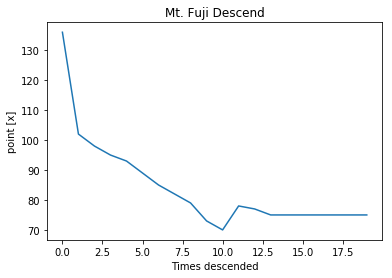

In [171]:
plt.title("Mt. Fuji Descend")
plt.xlabel("Times descended")
plt.ylabel("point [x]")
plt.plot(np.arange(0, len(descend_mt_plot(136)), 1), descend_mt_plot(136))
plt.show

### 【問題6】初期値の変更

問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

In [151]:
#300 points
points_x = np.arange(1, 300, 1)
points_x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

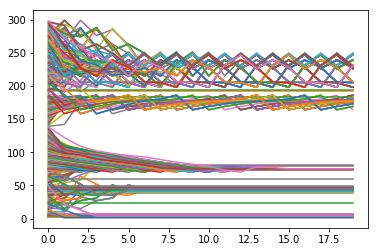

In [169]:
# Create x_points for all 300 points above
combined = []

for i in range(1, len(points_x)):
    combined.append(descend_mt_plot(i))
    

#Graph the results in matplotlib
for i in range(1, len(combined)):
    plt.plot(range(20), combined[i])
    plt.show
    

#plt.plot(range(20), combined[136])
#plt.show
    

### 【問題7】（アドバンス問題）ハイパーパラメータの変更

ハイパーパラメータ αを変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [182]:
#Function - incl alpha as parameter
def compute_grad_point_alpha(x_point, alpha):
    current_x = x_point
    slope = compute_grad(current_x)
    current_x = current_x - alpha * slope
    if (current_x > 300) or (current_x < 0): #turn around if the values hit end-points
        current_x = x_point + alpha * slope 
    return current_x.round()

y2 = compute_grad_point(295, 0.6)
y2

195.0

In [186]:
def descend_mt_plot_alpha(x_point, alpha):
    point = []
    point.append(x_point)
    new_point = x_point
    i=1
    while (i < 20):
        i+=1
        new_point = int(compute_grad_point_alpha(new_point, alpha))
        point.append(new_point)
    return point


print(descend_mt_plot_alpha(136, 0.1), "\n")
print(descend_mt_plot_alpha(295, 0.6), "\n")
print(descend_mt_plot_alpha(295, 0.9))

[136, 119, 114, 112, 106, 104, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80] 

[295, 195, 122, 82, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76] 

[295, 146, 277, 180, 205, 175, 188, 161, 211, 258, 201, 297, 271, 214, 273, 281, 256, 205, 175, 188]


In [176]:
combined_alpha = np.arange(0, 1, 0.1)
combined_alpha

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

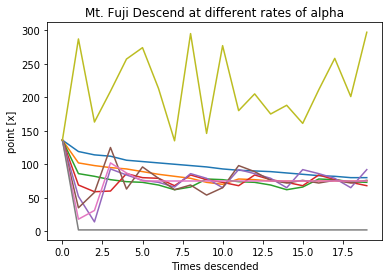

In [193]:
updated_alpha = []
for i in range(len(combined_alpha)):
    updated_alpha.append(descend_mt_plot_alpha(136, combined_alpha[i]))
    
for i in range(1, len(updated_alpha)):
    plt.title("Mt. Fuji Descend at different rates of alpha")
    plt.xlabel("Times descended")
    plt.ylabel("point [x]")
    plt.plot(range(20), updated_alpha[i])
    plt.show
    